# Developed work, Results and Conclusions

### Goal
The primary objective of this project is to develop and implement an AlphaZero-based Game Player capable of mastering strategic board games. Specifically, the focus will be on creating algorithms for playing Attaxx and Go, with the aim of achieving competitive performance against human players and other AI agents. The project seeks to leverage artificial intelligence techniques to enhance gameplay and strategic decision-making in these games.

## Main Features of the work

We organized our code across multiple files, each serving a specific function and relying on others, as illustrated in the hierarchy diagram above. In our opinion, the code is clear and well-organized, contributing to a more straightforward understanding of the work accomplished. In terms of execution performance, the menu is responsive, and the models make their moves quite quickly.

<br/>

<img src="boards/images/dependencies.png" alt="Dependencies" />

# AlphaZero : 
- This file implements AlphaZero, a reinforcement learning algorithm tailored for game scenarios. It incorporates CNNs and MCTS for training and decision-making. The AlphaZero class initializes with game parameters, setting up the neural network and MCTS. The self_play method generates training data through simulated self-play episodes. The learn method employs multiprocessing for parallelized self-play and data generation. The algorithm evaluates its performance, recording and saving win rates. Model management methods include saving, loading, and retrieving the last iteration of the model. Overall, this script trains an AlphaZero player, assesses its performance, and manages the trained model efficiently.

# CNNET : 
- This file defines a convolutional neural network (CNN) architecture, implemented in PyTorch, specifically designed for the AlphaZero algorithm in a game context. The CNNET class initializes with game parameters and sets up convolutional and fully connected layers. The forward method processes the game state through these layers to compute the policy and value. The train_model function uses training data to update the model's weights based on policy and value targets. Additionally, the script includes a method to load a pre-trained model. Overall, this file encapsulates the neural network structure crucial for the AlphaZero algorithm's learning process.

# MonteCarlo : 
- This file contains the implementation of the Monte Carlo Tree Search (MCTS) algorithm used in the AlphaZero framework for game-playing AI. The Node class represents a node in the MCTS tree, with methods for selection, expansion, and backpropagation. The MCTS class initializes with a game, a neural network model, and additional parameters. The search method conducts simulations to build and explore the MCTS tree, ultimately returning action probabilities based on the learned policy. The code efficiently navigates the game tree, evaluating potential moves and updating statistics for decision-making in the context of reinforcement learning.

# Players : 
- This file contains player implementations for the AlphaZero algorithm, a Random Player, and a Greedy Player. The AlphaZeroPlayer class utilizes the Monte Carlo Tree Search (MCTS) algorithm to select actions based on learned policies from a neural network model. The RandomPlayer class selects actions randomly from legal moves in the game. The GreedyPlayer class selects actions by evaluating each move's immediate reward and choosing the one with the highest reward. These player implementations cover different strategies, contributing to the diversity of opponents for training and evaluation within the AlphaZero framework.

# Ataxx : 
- This Python script utilizes the Pygame library for implementing the Ataxx game. It allows players to choose the game, game mode, and board size. The script leverages the AlphaZero library, providing an option to play against a trained model. The code is structured into functions for various gameplay actions, featuring navigation buttons for user interaction. The execution starts with the gameName() function. It's essential to note that the script depends on external modules such as AlphaZeroPlayer, CNNET, Ataxx, Go, Button, and args, requiring the Pygame library for proper functioning.

# Go : 
- This Python script implements the game of Go using the Pygame library. The class Go represents the game, with players denoted as 1 and -1 on the board. The board is a 2D matrix of size n x m, and a dictionary keeps track of players passing their turns. The script includes functionalities for cloning the game state, applying actions, checking if the game is over, updating scores, encoding and decoding moves, changing turns, and more. It provides methods for obtaining legal actions, encoded actions, and the encoded board state. Additionally, the script supports playing a full game between two players, including human and AI players, with a visual interface if verbose mode is enabled.


# Play : 
- This Pygame script for Ataxx and Go games allows the selection of the game, game mode, and board size. Using the AlphaZero library, it provides the option to play against a trained model. The code is organized into functions for different game actions and features buttons for navigation. Execution starts with gameName(). It's important to note that it depends on external modules like AlphaZeroPlayer, CNNET, Ataxx, Go, Button, and args, and also requires the Pygame library.

# Training : 
- This Python script utilizes the AlphaZero library to train models in Ataxx and Go games. Training parameters, game details, and model settings are specified in a dictionary called args. The script checks command-line arguments to determine the game type (Ataxx or Go) and the board size. Training occurs through the AlphaZero class. The code begins by loading a trained model if available, or starts a new training from scratch. Execution starts by checking the arguments and then instantiating and training the AlphaZero model. It's important to note that it depends on external modules like AlphaZero, CNNET, Ataxx, Go, and args.


### The Process for training
1º - Initialize AlphaZero with the neural network (CNNET) and Monte Carlo Tree Search (MCTS).

2º - Iterate through a set number of training cycles. For each iteration, execute a series of self-play episodes.

3º - For each simulation in the episode initialize the game state.

4º - Use Monte Carlo Tree Search (MCTS) to explore potential moves and select actions and accumulate the resulting state-action pairs.

5º - Train the convolutional neural network (CNNET) using the collected state-action pairs.

6º - Evaluate the trained model against various opponents (RandomPlayer, GreedyPlayer, AlphaZero baseline).

7º - Save the final trained model for future use if it performs best on average against all opponents.

8º - Repeat the training loop.


### Main Difficulties


Creating an AlphaZero-based Ataxx/Go Player came with tough challenges that needed teamwork and clever problem-solving. 
    
Initially, we had to split the tasks among us, figuring out who does what and keeping communication open. 

Learning the ins and outs of Go, a tricky board game, was tough but doable with research and help from Go enthusiasts. 

Building a solid Go class for the game's simulation required careful planning and close teamwork. 

Combining the Monte Carlo Tree Search (MCTS) algorithm with neural network training was tricky, finding the right balance was a puzzle. 

Training the neural network while simulating gameplay simultaneously needed a well-thought-out plan. 

Overcoming these challenges not only improved our technical skills but also gave us a better grasp of how artificial intelligence, game dynamics, and teamwork come together.

## Training

To train the models, we created a script with a menu that allows us to choose the game, the board size, and the number of iterations. You can run that like this:

```python
    python3 training.py
```

The training took a long time but we managed to train the models, considering the complexity, for good ammount of iterations. You can see the results below.

# Results

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

model_dir="./best_model/"
def graph(path):
    df = pd.read_csv(path)
    plt.plot(df.n_iter, df.RandomPlayer)
    plt.plot(df.n_iter, df.GreedyPlayer)
    plt.plot(df.n_iter, df.AlphaZeroBaseline)
    plt.title("Validation Games win-rate percentage")
    plt.xlabel("number of interations")
    plt.ylabel("algorithm")
    plt.legend(["RandomPlayer", "GreedyPlayer", "AlphaZeroBaseline"])
    plt.show()

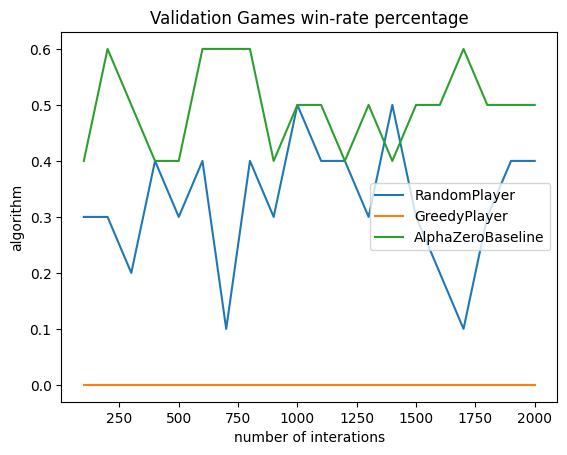

In [20]:
graph(f"{model_dir}A4x4/win_rates.csv")

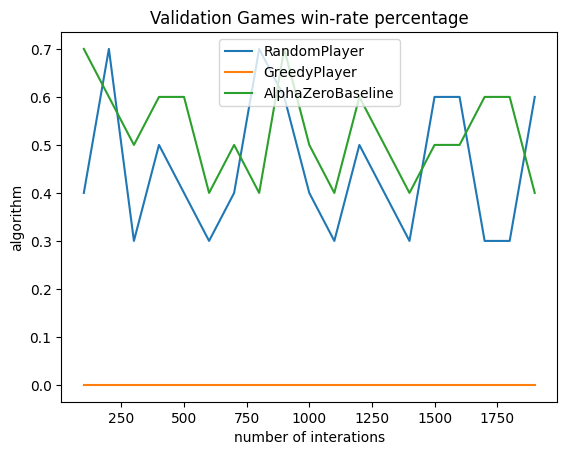

In [21]:
graph(f"{model_dir}A5x5/win_rates.csv")

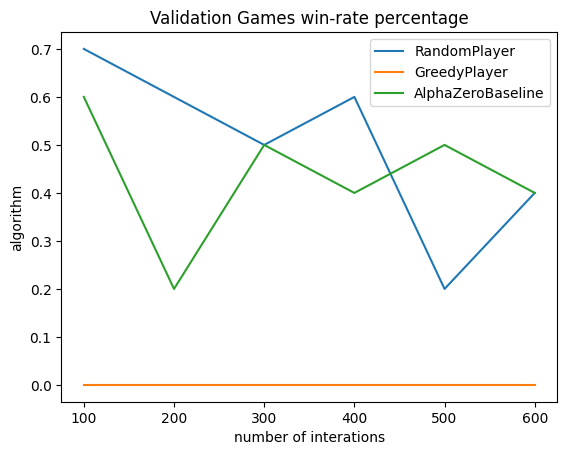

In [22]:
graph(f"{model_dir}A6x6/win_rates.csv")

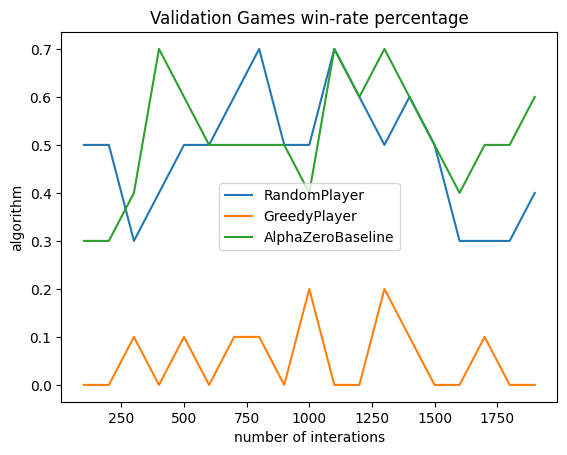

In [23]:
graph(f"{model_dir}G7x7/win_rates.csv")

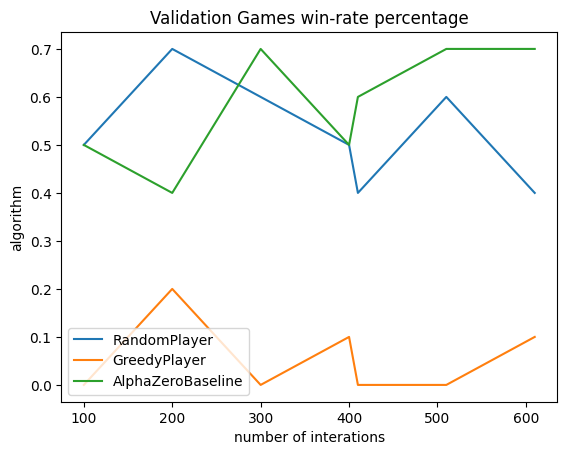

In [24]:
graph(f"{model_dir}G9x9/win_rates.csv")

## Testing

To test, we created a script with a menu that allows us to play against the trained model. You can run that like this:

```python
    python3 play.py
```

But for the sake of simplicity, we also created a notebook that allows you to play against the model. You can run it by executin the cells below.

In [24]:
from play import play_game

In [ ]:
play_game("A", True, 4, 4)

In [ ]:
play_game("A", True, 5, 5)

In [ ]:
play_game("A", True, 6, 6)

In [ ]:
play_game("G", True, 7, 7)

In [ ]:
play_game("G", True, 9, 9)

## Conclusions

We couldn't train the models further for computational reasons, but we believe that with more time and resources, we could achieve better results. We are proud of the work we accomplished, and we learned a lot in the process. We hope you enjoy playing against our models as much as we enjoyed creating them.